# <center>Instituto Superior de Engenharia de Lisboa</center>

<center>Área Departamental de Engenharia Química</center>

<center>Biomedical Engineering Master's</center>

## <center>CEMEERS-24A</center>
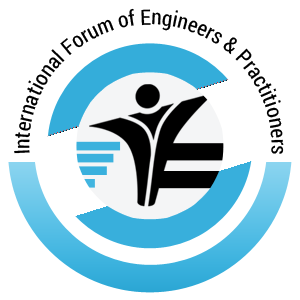

### <center>Dynamic study of carbon-nitrogen competition between the malignant and secondary tumor for breast cancer in the metastasis process</center>

# <center>Apendix</center>  

#### <center>Authors:</center>
<center>José Alberto Rodrigues PhD and João Domingos Serra Lopes</center>

    


<hr>
<hr>

## The model investigates the growth dynamics of primary p(t) and secondary s(t) tumours within a resource-dependent framework.

\begin{gathered}
\frac{dp}{dt}=\left[\alpha_1Ve^{-\beta_1V}-\left(d_{\max,1}-\frac{\sigma_1c(t)}{K_{_{d,1}}+c(t)}\right)-\delta\right]p(t), \\
\frac{ds}{dt}=\left[\alpha_2Ve^{-\beta_2V}-\left(d_{\max,2}-\frac{\sigma_2c(t)}{K_{_{d,2}}+c(t)}\right)-\delta\right]s(t), \\
\frac{dc}{dt} =\lambda_c\left[C_B-c(t)\right]-\gamma_1\left(\alpha_1Vp(t)e^{-\beta_1V}\right)-\gamma_2\left(\alpha_2Vs(t)e^{-\beta_2V}\right), \\
\frac{dn}{dt}=\lambda_N\left[N_B-n(t)\right]-\omega_1p(t)n(t)-\omega_2s(t)n(t), \\
 V=\frac{c(t)}{n(t)+\varepsilon}. 
\end{gathered}

| Variável dependente | Interpretação biológica | `: Unidades` |
|---|---|---|
| $p(t)$ | Massa do tumor primário | gramas (g) |
| $s(t)$ | Massa do tumor secundário | gramas (g) |
| $c(t)$ | Concentração de carbono | mol/litro (M) |
| $n(t)$ | Concentração de nitrogénio | mol/litro (M) |


| Parâmetro | Interpretação biológica | Unidades |
|---|---|---|
| $\alpha_i$ | Taxa de crescimento per capita do tumor $i$ | $(dias)^{-1}$ |
| $\beta_i$ | Sensibilidade da taxa de crescimento do tumor $i$ às variações na razão C:N | adimensional |
| $d_{max,i}$ | Taxa máxima de morte devido à limitação de nutrientes para o tumor $i$ | $(dias)^{-1}$ |
| $\sigma_i$ | Taxa de morte per capita devido à limitação de nutrientes para o tumor $i$ | $(dias)^{-1}$ |
| $K_{d,i}$ | Concentração de nutriente na metade da taxa máxima de morte para o tumor $i$ | mol/litro (M) |
| $d_{i,0}$ | Taxa de morte de causas não relacionadas à falta de nutriente para o tumor $i$ | $(dias)^{-1}$ |
| $\lambda_c$ | Taxa de influxo de carbono para o ambiente | $(dias)^{-1}$ |
| $\lambda_w$ | Taxa de influxo de nitrogénio para o ambiente | $(dias)^{-1}$ |
| $C_B$ | Concentração de carbono intersticial | mol/litro (M) |
| $N_k$ | Concentração de nitrogénio intersticial | mol/litro (M) |
| $\gamma_i$ | Taxa de sequestro de carbono para o tumor $i$ | mol/(g-litro) |
| $\Theta_i$ | Taxa de sequestro de nitrogénio para o tumor $i$ | $(g\cdot dias)^{-1}$ |



# Versão Genérica - Modelo 

### (Generic Method - Winkler, Jonathan Alexander. “A mathematical model of competition for nutrients between malignant and secondary tumors.” Arizona State University (2005). )

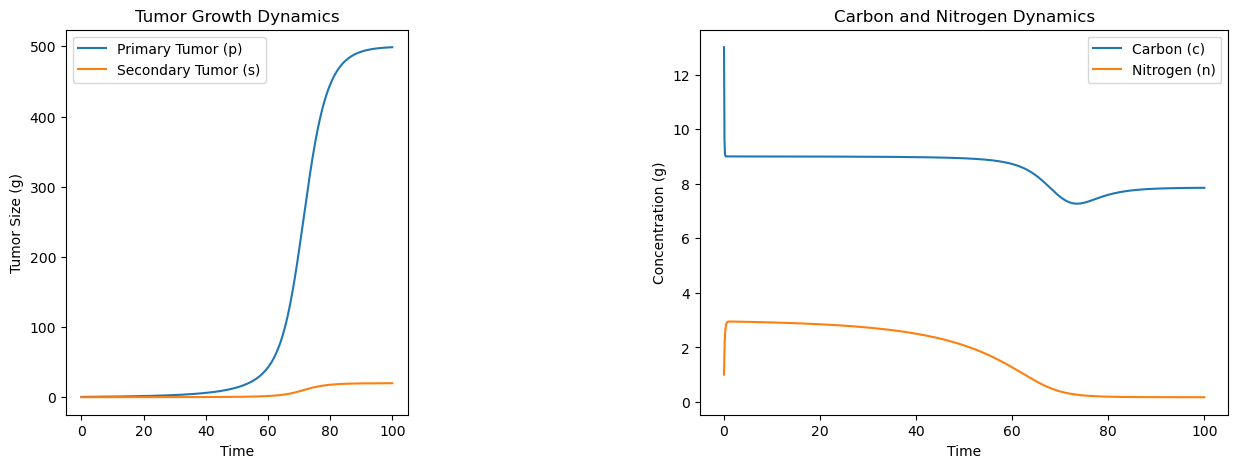

In [5]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the system of differential equations
def model(y, t, alpha1, beta1, dmax1, sigma1, Kd1, delta, alpha2, beta2, dmax2, sigma2, Kd2, gamma1, gamma2, lambda_c, C_B, lambda_N, N_B, omega1, omega2, epsilon):
    p, s, c, n = y

    V = c / (n + epsilon)

    dpdt = (alpha1 * V * np.exp(-beta1 * V) - (dmax1 - sigma1 * c / (Kd1 + c)) - delta) * p
    dsdt = (alpha2 * V * np.exp(-beta2 * V) - (dmax2 - sigma2 * c / (Kd2 + c)) - delta) * s
    dcdt = lambda_c * (C_B - c) - gamma1 * (alpha1 * V * p * np.exp(-beta1 * V)) - gamma2 * (alpha2 * V * s * np.exp(-beta2 * V))
    dndt = lambda_N * (N_B - n) - omega1 * p * n - omega2 * s * n

    return [dpdt, dsdt, dcdt, dndt]

# Initial conditions
initial_p = 0.5  # Initial size of the primary tumor (g)
initial_s = 0.02  # Initial size of the secondary tumor (g)

initial_c = 13
initial_n = 1 

initial_conditions = [initial_p, initial_s, initial_c, initial_n]

# Time points
t = np.linspace(0, 100, 1000)

# Parameters based on the provided information
alpha1 = 0.05
alpha2 = 0.05
beta1 = 0.077
beta2 = 0.077
dmax1 = 1.0
dmax2 = 1.0
sigma1 = 1.0
sigma2 = 1.0
Kd1 = 0.5
Kd2 = 0.5
delta = 0.01
lambda_c = 19.0
lambda_N = 6.40
epsilon = 0.00001
C_B = 9
N_B = 3
gamma1 = 0.60
gamma2 = 0.60
omega1 = 0.20
omega2 = 0.20

# Solve the system of differential equations
solution = odeint(model, initial_conditions, t, args=(alpha1, beta1, dmax1, sigma1, Kd1, delta, alpha2, beta2, dmax2, sigma2, Kd2, gamma1, gamma2, lambda_c, C_B, lambda_N, N_B, omega1, omega2, epsilon))

# Extracting solutions
p, s, c, n = solution.T

# Plot the results
plt.figure(figsize=(15, 5))

# Tumor growth dynamics
plt.subplot(1, 3, 1)
plt.plot(t, p, label='Primary Tumor (p)')
plt.plot(t, s, label='Secondary Tumor (s)')
plt.xlabel('Time')
plt.ylabel('Tumor Size (g)')
plt.legend()
plt.title('Tumor Growth Dynamics')

# Combined Carbon and Nitrogen dynamics
plt.subplot(1, 2, 2)
plt.plot(t, c, label='Carbon (c)')
plt.plot(t, n, label='Nitrogen (n)')
plt.xlabel('Time')
plt.ylabel('Concentration (g)')
plt.legend()
plt.title('Carbon and Nitrogen Dynamics')


plt.show()

# Versão total biomassa


## Carbon and nitrogen total biomass percentages in Breast Cancer 

## C0 and N0 changed accordingly

## Keibler, M.A., Wasylenko, T.M., Kelleher, J.K. et al. Metabolic requirements for cancer cell proliferation. Cancer Metab 4, 16 (2016). 

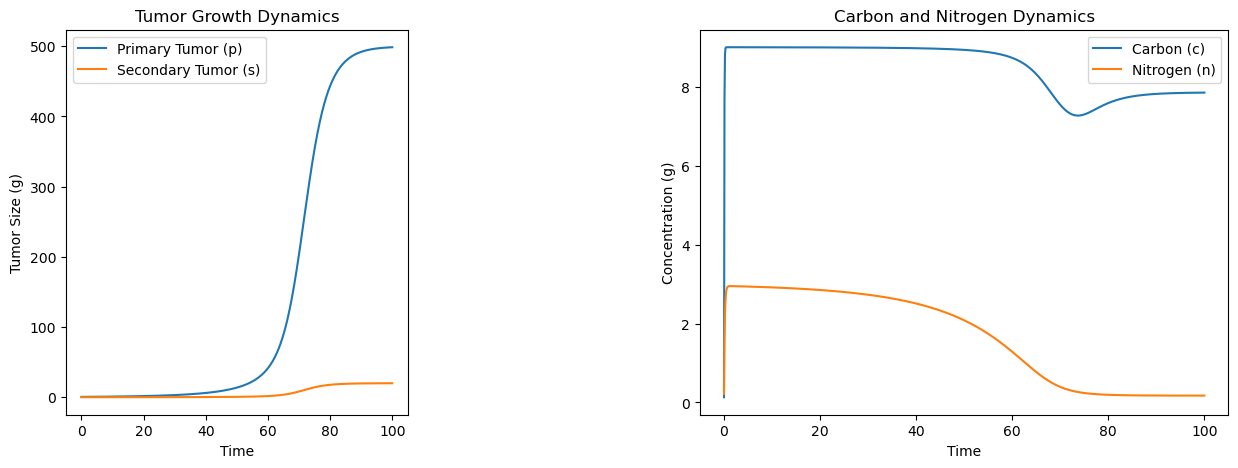

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the system of differential equations
def model(y, t, alpha1, beta1, dmax1, sigma1, Kd1, delta, alpha2, beta2, dmax2, sigma2, Kd2, gamma1, gamma2, lambda_c, C_B, lambda_N, N_B, omega1, omega2, epsilon):
    p, s, c, n = y

    V = c / (n + epsilon)

    dpdt = (alpha1 * V * np.exp(-beta1 * V) - (dmax1 - sigma1 * c / (Kd1 + c)) - delta) * p
    dsdt = (alpha2 * V * np.exp(-beta2 * V) - (dmax2 - sigma2 * c / (Kd2 + c)) - delta) * s
    dcdt = lambda_c * (C_B - c) - gamma1 * (alpha1 * V * p * np.exp(-beta1 * V)) - gamma2 * (alpha2 * V * s * np.exp(-beta2 * V))
    dndt = lambda_N * (N_B - n) - omega1 * p * n - omega2 * s * n

    return [dpdt, dsdt, dcdt, dndt]

# Initial conditions
initial_p = 0.5  # Initial size of the primary tumor (g)
initial_s = 0.02  # Initial size of the secondary tumor (g)

# Modify initial conditions for carbon and nitrogen based on the given percentages
initial_c = 25.7 / 100 * (initial_p + initial_s)  # 25.7% of total biomass
initial_n = 41.6 / 100 * (initial_p + initial_s)  # 41.6% of total biomass

initial_conditions = [initial_p, initial_s, initial_c, initial_n]

# Time points
t = np.linspace(0, 100, 1000)

# Parameters based on the provided information
alpha1 = 0.05
alpha2 = 0.05
beta1 = 0.077
beta2 = 0.077
dmax1 = 1.0
dmax2 = 1.0
sigma1 = 1.0
sigma2 = 1.0
Kd1 = 0.5
Kd2 = 0.5
delta = 0.01
lambda_c = 19.0
lambda_N = 6.40
epsilon = 0.00001
C_B = 9
N_B = 3
gamma1 = 0.60
gamma2 = 0.60
omega1 = 0.20
omega2 = 0.20

# Solve the system of differential equations
solution = odeint(model, initial_conditions, t, args=(alpha1, beta1, dmax1, sigma1, Kd1, delta, alpha2, beta2, dmax2, sigma2, Kd2, gamma1, gamma2, lambda_c, C_B, lambda_N, N_B, omega1, omega2, epsilon))

# Extracting solutions
p, s, c, n = solution.T

# Plot the results
plt.figure(figsize=(15, 5))

# Tumor growth dynamics
plt.subplot(1, 3, 1)
plt.plot(t, p, label='Primary Tumor (p)')
plt.plot(t, s, label='Secondary Tumor (s)')
plt.xlabel('Time')
plt.ylabel('Tumor Size (g)')
plt.legend()
plt.title('Tumor Growth Dynamics')

# Combined Carbon and Nitrogen dynamics
plt.subplot(1, 2, 2)
plt.plot(t, c, label='Carbon (c)')
plt.plot(t, n, label='Nitrogen (n)')
plt.xlabel('Time')
plt.ylabel('Concentration (g)')
plt.legend()
plt.title('Carbon and Nitrogen Dynamics')


plt.show()

 # Versão total biomassa não essencial
 
 ## Non-essential biomass percentages of Carbon and Nitrogen (not used in paper) - C0 and N0 values changed
 
 ## Keibler, M.A., Wasylenko, T.M., Kelleher, J.K. et al. Metabolic requirements for cancer cell proliferation. Cancer Metab 4, 16 (2016). 

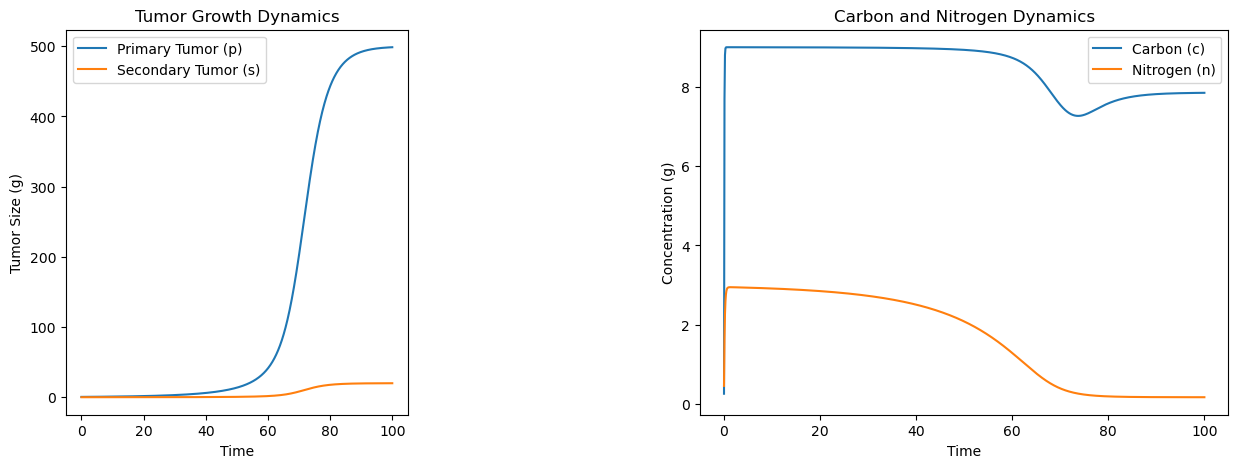

In [4]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the system of differential equations
def model(y, t, alpha1, beta1, dmax1, sigma1, Kd1, delta, alpha2, beta2, dmax2, sigma2, Kd2, gamma1, gamma2, lambda_c, C_B, lambda_N, N_B, omega1, omega2, epsilon):
    p, s, c, n = y

    V = c / (n + epsilon)

    dpdt = (alpha1 * V * np.exp(-beta1 * V) - (dmax1 - sigma1 * c / (Kd1 + c)) - delta) * p
    dsdt = (alpha2 * V * np.exp(-beta2 * V) - (dmax2 - sigma2 * c / (Kd2 + c)) - delta) * s
    dcdt = lambda_c * (C_B - c) - gamma1 * (alpha1 * V * p * np.exp(-beta1 * V)) - gamma2 * (alpha2 * V * s * np.exp(-beta2 * V))
    dndt = lambda_N * (N_B - n) - omega1 * p * n - omega2 * s * n

    return [dpdt, dsdt, dcdt, dndt]

# Initial conditions
initial_p = 0.5  # Initial size of the primary tumor (g)
initial_s = 0.02  # Initial size of the secondary tumor (g)

# Modify initial conditions for carbon and nitrogen based on the given percentages
initial_c = 50.5 / 100 * (initial_p + initial_s)  # 50.5% of total biomass
initial_n = 88.4 / 100 * (initial_p + initial_s)  # 88.4% of total biomass

initial_conditions = [initial_p, initial_s, initial_c, initial_n]

# Time points
t = np.linspace(0, 100, 1000)

# Parameters based on the provided information
alpha1 = 0.05
alpha2 = 0.05
beta1 = 0.077
beta2 = 0.077
dmax1 = 1.0
dmax2 = 1.0
sigma1 = 1.0
sigma2 = 1.0
Kd1 = 0.5
Kd2 = 0.5
delta = 0.01
lambda_c = 19.0
lambda_N = 6.40
epsilon = 0.00001
C_B = 9
N_B = 3
gamma1 = 0.60
gamma2 = 0.60
omega1 = 0.20
omega2 = 0.20

# Solve the system of differential equations
solution = odeint(model, initial_conditions, t, args=(alpha1, beta1, dmax1, sigma1, Kd1, delta, alpha2, beta2, dmax2, sigma2, Kd2, gamma1, gamma2, lambda_c, C_B, lambda_N, N_B, omega1, omega2, epsilon))

# Extracting solutions
p, s, c, n = solution.T

# Plot the results
plt.figure(figsize=(15, 5))

# Tumor growth dynamics
plt.subplot(1, 3, 1)
plt.plot(t, p, label='Primary Tumor (p)')
plt.plot(t, s, label='Secondary Tumor (s)')
plt.xlabel('Time')
plt.ylabel('Tumor Size (g)')
plt.legend()
plt.title('Tumor Growth Dynamics')

# Combined Carbon and Nitrogen dynamics
plt.subplot(1, 2, 2)
plt.plot(t, c, label='Carbon (c)')
plt.plot(t, n, label='Nitrogen (n)')
plt.xlabel('Time')
plt.ylabel('Concentration (g)')
plt.legend()
plt.title('Carbon and Nitrogen Dynamics')


plt.show()

# Levels of carbon and nitrogen in the surroundings are equal: CB = NB = 9

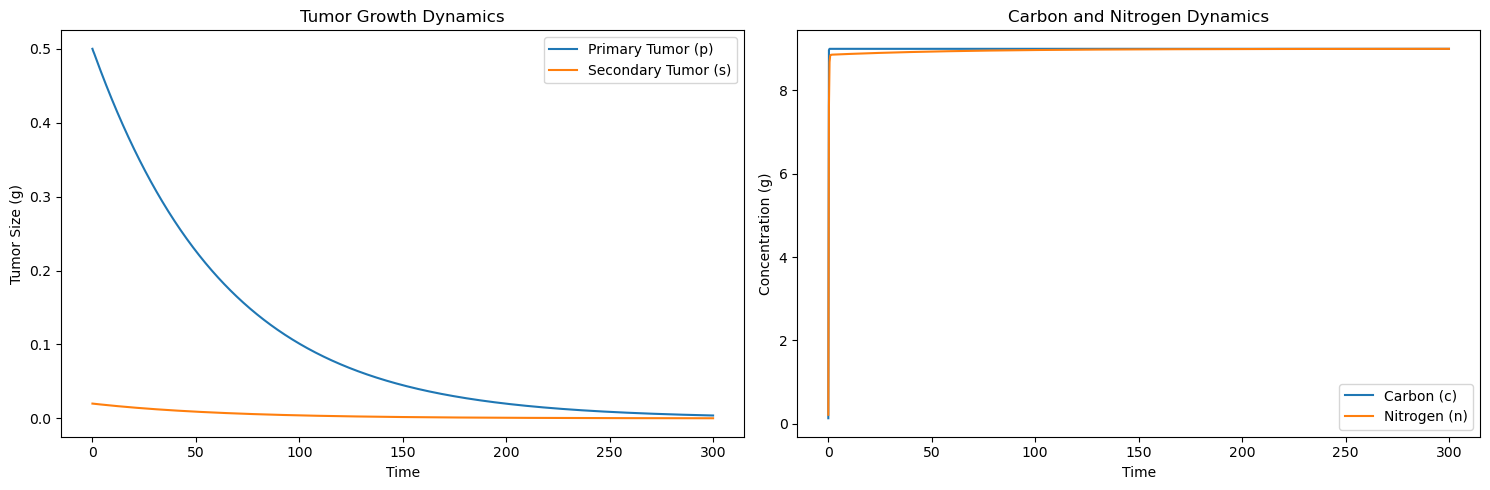

In [7]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the system of differential equations
def model(y, t, alpha1, beta1, dmax1, sigma1, Kd1, delta, alpha2, beta2, dmax2, sigma2, Kd2, gamma1, gamma2, lambda_c, C_B, lambda_N, N_B, omega1, omega2, epsilon):
    p, s, c, n = y

    V = c / (n + epsilon)

    dpdt = (alpha1 * V * np.exp(-beta1 * V) - (dmax1 - sigma1 * c / (Kd1 + c)) - delta) * p
    dsdt = (alpha2 * V * np.exp(-beta2 * V) - (dmax2 - sigma2 * c / (Kd2 + c)) - delta) * s
    dcdt = lambda_c * (C_B - c) - gamma1 * (alpha1 * V * p * np.exp(-beta1 * V)) - gamma2 * (alpha2 * V * s * np.exp(-beta2 * V))
    dndt = lambda_N * (N_B - n) - omega1 * p * n - omega2 * s * n

    return [dpdt, dsdt, dcdt, dndt]

# Initial conditions
initial_p = 0.5  # Initial size of the primary tumor (g)
initial_s = 0.02  # Initial size of the secondary tumor (g)

# Modify initial conditions for carbon and nitrogen based on the given percentages
initial_c = 25.7 / 100 * (initial_p + initial_s)  # 50.5% of total biomass
initial_n = 41.6 / 100 * (initial_p + initial_s)  # 88.4% of total biomass

initial_conditions = [initial_p, initial_s, initial_c, initial_n]

# Time points
t = np.linspace(0, 300, 1000)

# Parameters based on the provided information
alpha1 = 0.05
alpha2 = 0.05
beta1 = 0.077
beta2 = 0.077
dmax1 = 1.0
dmax2 = 1.0
sigma1 = 1.0
sigma2 = 1.0
Kd1 = 0.5
Kd2 = 0.5
delta = 0.01
lambda_c = 19.0
lambda_N = 6.40
epsilon = 0.00001
C_B = 9
N_B = 9
gamma1 = 0.60
gamma2 = 0.60
omega1 = 0.20
omega2 = 0.20

# Solve the system of differential equations
solution = odeint(model, initial_conditions, t, args=(alpha1, beta1, dmax1, sigma1, Kd1, delta, alpha2, beta2, dmax2, sigma2, Kd2, gamma1, gamma2, lambda_c, C_B, lambda_N, N_B, omega1, omega2, epsilon))

# Extracting solutions
p, s, c, n = solution.T

# Plot the results
plt.figure(figsize=(15, 5))

# Tumor growth dynamics
plt.subplot(1, 2, 1)
plt.plot(t, p, label='Primary Tumor (p)')
plt.plot(t, s, label='Secondary Tumor (s)')
plt.xlabel('Time')
plt.ylabel('Tumor Size (g)')
plt.legend()
plt.title('Tumor Growth Dynamics')



# Primary tumor marked by a slower growth rate and a heightened optimal C:N ratio: alpha1 < alpha 2; beta1 < beta 2

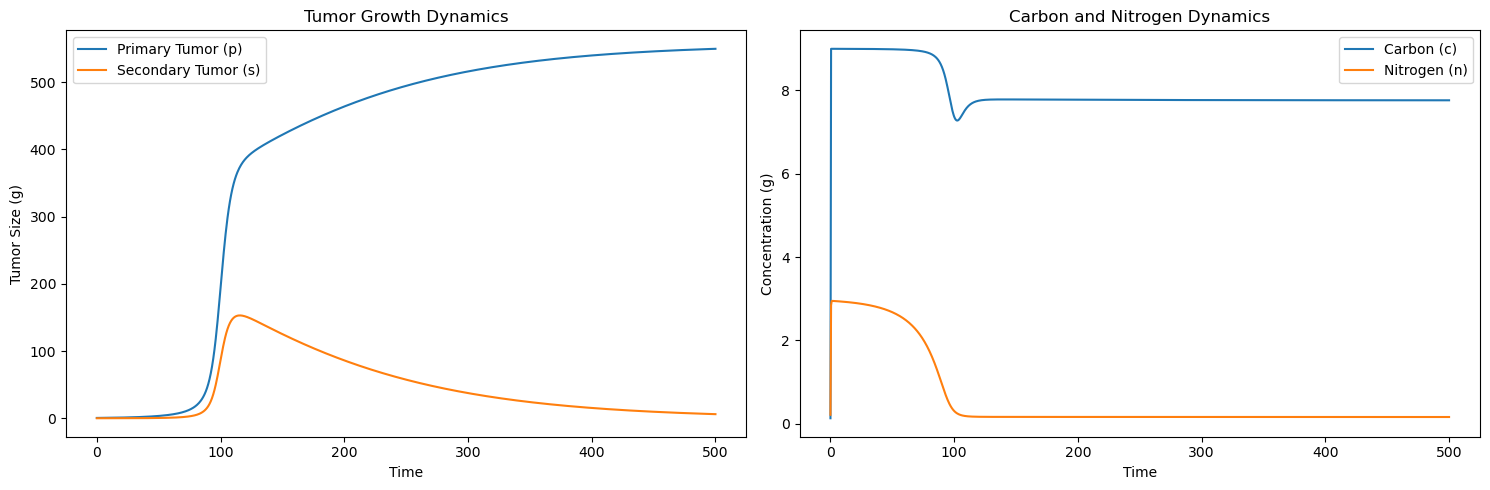

In [17]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the system of differential equations
def model(y, t, alpha1, beta1, dmax1, sigma1, Kd1, delta, alpha2, beta2, dmax2, sigma2, Kd2, gamma1, gamma2, lambda_c, C_B, lambda_N, N_B, omega1, omega2, epsilon):
    p, s, c, n = y

    V = c / (n + epsilon)

    dpdt = (alpha1 * V * np.exp(-beta1 * V) - (dmax1 - sigma1 * c / (Kd1 + c)) - delta) * p
    dsdt = (alpha2 * V * np.exp(-beta2 * V) - (dmax2 - sigma2 * c / (Kd2 + c)) - delta) * s
    dcdt = lambda_c * (C_B - c) - gamma1 * (alpha1 * V * p * np.exp(-beta1 * V)) - gamma2 * (alpha2 * V * s * np.exp(-beta2 * V))
    dndt = lambda_N * (N_B - n) - omega1 * p * n - omega2 * s * n

    return [dpdt, dsdt, dcdt, dndt]

# Initial conditions
initial_p = 0.5  # Initial size of the primary tumor (g)
initial_s = 0.02  # Initial size of the secondary tumor (g)

# Modify initial conditions for carbon and nitrogen based on the given percentages
initial_c = 25.7 / 100 * (initial_p + initial_s)  # 50.5% of total biomass
initial_n = 41.6 / 100 * (initial_p + initial_s)  # 88.4% of total biomass

initial_conditions = [initial_p, initial_s, initial_c, initial_n]

# Time points
t = np.linspace(0, 500,1000)

# Parameters based on the provided information
alpha1 = 0.04
alpha2 = 0.05
beta1 = 0.0693
beta2 = 0.077
dmax1 = 1.0
dmax2 = 1.0
sigma1 = 1.0
sigma2 = 1.0
Kd1 = 0.5
Kd2 = 0.5
delta = 0.01
lambda_c = 19.0
lambda_N = 6.40
epsilon = 0.00001
C_B = 9
N_B = 3
gamma1 = 0.60
gamma2 = 0.60
omega1 = 0.20
omega2 = 0.20

# Solve the system of differential equations
solution = odeint(model, initial_conditions, t, args=(alpha1, beta1, dmax1, sigma1, Kd1, delta, alpha2, beta2, dmax2, sigma2, Kd2, gamma1, gamma2, lambda_c, C_B, lambda_N, N_B, omega1, omega2, epsilon))

# Extracting solutions
p, s, c, n = solution.T

# Plot the results
plt.figure(figsize=(15, 5))

# Tumor growth dynamics
plt.subplot(1, 2, 1)
plt.plot(t, p, label='Primary Tumor (p)')
plt.plot(t, s, label='Secondary Tumor (s)')
plt.xlabel('Time')
plt.ylabel('Tumor Size (g)')
plt.legend()
plt.title('Tumor Growth Dynamics')

# Combined Carbon and Nitrogen dynamics
plt.subplot(1, 2, 2)
plt.plot(t, c, label='Carbon (c)')
plt.plot(t, n, label='Nitrogen (n)')
plt.xlabel('Time')
plt.ylabel('Concentration (g)')
plt.legend()
plt.title('Carbon and Nitrogen Dynamics')

plt.tight_layout()
plt.show()
